In [1]:
#  Predict whether consumers will buy houses or not, given their age and salary.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

%matplotlib inline

In [3]:
# Reading the dataset 
df = pd.read_csv("HomeBuyer.csv") 
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
display(df.describe())

print("Shape : " , df.shape)

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Shape :  (400, 3)


In [5]:
# Checking for any missing values in the dataset 
df.isnull().sum() 

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x = df[["Age" , "EstimatedSalary"]]
y = df.iloc[: , 2 ]

display(x.head(3))


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


In [7]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix 

In [ ]:
scaler = StandardScaler() #Creating an instance of StandardScaler 
scaler.fit(x) 
scaled_x = scaler.transform(x) 
y = y.values # converting y into numpy array 

In [9]:
print(y.values)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [9]:
scaled_x 

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [10]:
X_train ,X_test, y_train , y_test = train_test_split(scaled_x , y , test_size = 0.25 , random_state = 0 ) 

classifier = LogisticRegression() # creating an instance of logistic regression classifier 

classifier.fit(X_train , y_train) # fit the model 


LogisticRegression()

In [11]:
# Evaluation metrics 

y_pred = classifier.predict(X_test )
accuracy  = round(accuracy_score(y_test , y_pred ) * 100 , 2 ) 
print(f"Accuracy : {accuracy}" )

conf_matrix = confusion_matrix(y_test , y_pred )
print(conf_matrix ) 


Accuracy : 89.0
[[65  3]
 [ 8 24]]


[[3.29638950e-08 3.33264554e-08 3.36930035e-08 ... 1.79312175e-03
  1.81280803e-03 1.83271004e-03]
 [3.36780759e-08 3.40484914e-08 3.44229809e-08 ... 1.83189955e-03
  1.85201077e-03 1.87234237e-03]
 [3.44077300e-08 3.47861707e-08 3.51687737e-08 ... 1.87151439e-03
  1.89205969e-03 1.91283010e-03]
 ...
 [9.84358050e-01 9.84525586e-01 9.84691356e-01 ... 9.99999708e-01
  9.99999712e-01 9.99999715e-01]
 [9.84684674e-01 9.84848766e-01 9.85011127e-01 ... 9.99999715e-01
  9.99999718e-01 9.99999721e-01]
 [9.85004583e-01 9.85165298e-01 9.85324318e-01 ... 9.99999721e-01
  9.99999724e-01 9.99999727e-01]]


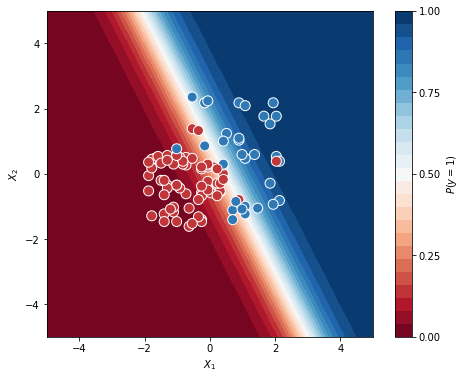

In [12]:
# visualization 
    
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])


ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=100,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.show()